<h1> <center> Taller de análisis y visualización de datos con R </center> </h1>

<h2> <center>  1. Manipulación de datos con R </center> </h2>

<!-- <h3> <center> Jorge Castro - jcastro@cenat.ac.cr </center> </h3>
<h3> <center> Diego Jiménez - djimenez@cenat.ac.cr </center> </h3> -->



 <table>  
  <tr>
    <td><h3>Jorge Castro</h3></td>
    <td><h3>jcastro@cenat.ac.cr</h3></td>
  </tr>  
  <tr>
    <td><h3>Diego Jiménez</h3></td>
    <td><h3>djimenez@cenat.ac.cr</h3></td>
  </tr> 
</table>

<table>  
  <tr>
    <td> <img align="left" src="img/cnca.png", width=400></td>
    <td> <img align="right" src="img/cenat.png", width=400></td>
  </tr>  
  <tr>
    <td colspan="2"> <center> <h3> Octubre 2017 </h3> </center> </td>
  </tr>  
</table>

# Contenido

1. [Filtrado y selección de datos](#filtradoyseleccion)
    - [Vectores condicionales](#veccond) 
    - [Subconjuntos](#subc)   
<br>
2. [Tratamiento de valores inválidos](#invalidos)
    - [Identificación NA y NaN](#nans)
    - [Tratamiento de registros inválidos](#tratamiento)
<br>
<br>
3. [Pruebas de normalidad](#normalidad)
    - [Agregación](#agregacion)
    - [Pruebas de normalidad](#pnormalidad)
<br>
<br>
4. [Transformación de datos](#transformacion)
    - [Transformaciones logarítmicas](#logaritmicas)
    - [Transformaciones exponenciales](#exponenciales)  
<br>
5. [Práctica de manipulación de datos](#practica)

<a id='filtradoyseleccion'></a>
<hr>
<hr>
<h1><center><span style="color:blue">Filtrado y selección de datos</span></center></h1>
<hr>
<hr>



# Filtrado y selección  <a id='condicionales'></a>

- En R pueden aplicarse condiciones lógicas a todos los datos en un marco de datos o un vector
    -  **Resultado**: un vector de booleanas que indica cuáles registros cumplen la condición impuesta y cuales no
    - Por ejemplo, si se tienen datos de personas y países en los que viven, se pueden filtrar las personas que viven en China
 



 

In [19]:
mock <- read.csv("dataset/MOCK_DATA.csv", stringsAsFactors=F) #www.mockaroo.com

class(mock)
#str(mock)
head(mock$country)           
isChinese <- mock$country == "China"
head(isChinese)
           

[1] "data.frame"

[1] "Yemen"     "Indonesia" "China"     "China"     "China"     "Indonesia"

[1] FALSE FALSE  TRUE  TRUE  TRUE FALSE

# Operaciones sobre la selección <a id='veccond'></a>

- El operador $[i]$ permite aplicar una operación masiva sobre todos los datos seleccionados. 
    - Por ejemplo, una vez identificados los registros en los cuales el país es China, es posible asignar a todos esos registros el valor 100 en la columna puntaje    
    - Es posible también contar los valores, usando la función *sum* con el vector de booleanas.

In [23]:
# Operaciones sobre el subconjunto de observaciones de CHINA
mock <- read.csv("dataset/MOCK_DATA.csv", stringsAsFactors=F)
isChinese <- mock$country == "China"
head(mock$score)        
mock$score[isChinese] <- 100    # Asignar un valor a todos los registros
head(mock$score)
                  
sum(!isChinese) # Conteo de personas de China

[1] -1.78  0.01 -0.31  0.34  1.24  0.95

[1]  -1.78   0.01 100.00 100.00 100.00   0.95

[1] 798

In [24]:
#Obtener vector de apellidos de personas de Costa Rica ----
isCostaRican <- mock$country == "Costa Rica" 
apellidosCR <- mock$last_name[isCostaRican]
apellidosCR

#¿Cuantas personas hay de Costa Rica?
sum(isCostaRican)

[1] "Simpson" "Payne"   "Willis"  "Collins" "Ramirez" "Miller"

[1] 6

# Subconjuntos <a id='subc'></a>

- Es posible extraer una parte de un marco de datos usando el operador $[i,i]$
    - Solamente es necesario indicar un vector con los índices deseados:
        - Números de índice
        - Vector de booleanas.

In [29]:
mock <- read.csv("dataset/MOCK_DATA.csv", stringsAsFactors=F)
nrow(mock) #Ver cantidad de observaciones/filas/tuplas
            
firstTenMock <- mock[1:10,]
nrow(firstTenMock) #primeras diez tuplas
           
isChinese <- mock$country == "China"
chineseMock <- mock[isChinese,]     # Extrae todas las filas con el país China
nrow(chineseMock)

chineseMock2 <- subset(mock, country=="China") # Extrae todas las filas con el país China con subset()
nrow(chineseMock2)

#Obtener nombre y apellido de las personas de Indonesia en las 7 primeras observaciones
first7 <- mock[1:7,c("first_name","last_name","country")]
first7
#print("Personas de Indonesia en las primeras 7 observaciones:")
first7Indonesia

[1] 1000

[1] 10

[1] 202

[1] 202

first_name,last_name,country
Rachel,Barnes,Yemen
Jean,Peterson,Indonesia
Rose,Carpenter,China
Matthew,Hart,China
Ralph,Sanchez,China
Samuel,Wilson,Indonesia
Juan,Clark,Albania


,first_name,last_name,country
2,Jean,Peterson,Indonesia
6,Samuel,Wilson,Indonesia


# Muestreo

- Un método alternativo para seleccionar elementos de un marco de datos o un vector es por medio de muestreo aleatorio
    - La función *sample()* devuelve registros o índices aleatorios de un vector y los almacena en otro vector resultante
    - Dicho resultado se puede utilizar para filtrar la muestra

In [36]:
mock <- read.csv("dataset/MOCK_DATA.csv", stringsAsFactors=F)
nrow(mock)

#sample(Intervalo de muestreo, cantidad de numeros, con o sin reemplazo)
sampleIndex <- sample(1000, 10, replace = F)
sampleIndex
sampleMock <- mock[sampleIndex,]
nrow(sampleMock)
head(sampleMock,3)

[1] 1000

[1] 977 554 312  88 138 224 467 756 964 232

[1] 10

,id,first_name,last_name,email,country,ip_address,score
977,977,Jane,Lynch,jlynchr4@trellian.com,China,10.178.99.82,0.82
554,554,Eugene,Matthews,ematthewsfd@google.es,China,124.209.29.155,0.96
312,312,Deborah,Johnston,djohnston8n@tinypic.com,China,197.134.30.198,-0.84


# Muestreo

- La función *sample()* puede recibir como primer parámetro un número entero
    - El intervalo usado para la muestra será entre 1 y el número indicado 
    - Esta función en conjunto con la función *nrow()* permite calcular una muestra del total de registros de un marco de datos

In [37]:
filas <- nrow(mock)
muestra <- mock[sample(filas, 10, replace = F),]
nrow(muestra)
#muestra

[1] 10

# Paquete **dplyr**

- El paquete *dplyr* provee rutinas optimizadas para facilitar el manejo de marcos de datos (filtrado, reordenamiento, selección, etc.)
    - **select**: escoger un subconjunto de las columnas de un marco de datos
    - **filter**: extraer un subconjunto de muestras o filas basados en condiciones lógicas
    - **reorder**: reordenar filas de un marco de datos
    - **%>% (pipe)**: permite establecer flujos de operaciones

<br>

<div class="alert alert-warning">
<b>Nota</b> - Una ventaja de las funciones de dplyr es que son muy rápidas ya que están implementadas en C++
</div>
    
<i>  Para más información sobre el paquete dplyr, consultar la
[página de dplyr](http://dplyr.tidyverse.org/) o su documentación en el [CRAN](https://cran.r-project.org/web/packages/dplyr/vignettes/dplyr.html).</i>

In [39]:
library(dplyr)
mock <- read.csv("dataset/MOCK_DATA.csv", stringsAsFactors=F)

#La función select puede ser utilizada para escoger columnas de interés
subset <- select(mock, c(first_name, last_name, score))
head(subset)

#La función filter permite seleccionar registros basados en alguna condición dada.
chineseMock <- filter(mock, country=="China")
head(chineseMock)

#La función arrange permite reordenar los registros con respecto a alguna variable de interés.
bestScores <- arrange(chineseMock, desc(score))
head(bestScores)


first_name,last_name,score
Rachel,Barnes,-1.78
Jean,Peterson,0.01
Rose,Carpenter,-0.31
Matthew,Hart,0.34
Ralph,Sanchez,1.24
Samuel,Wilson,0.95


id,first_name,last_name,email,country,ip_address,score
3,Rose,Carpenter,rcarpenter2@mashable.com,China,129.111.212.31,-0.31
4,Matthew,Hart,mhart3@yandex.ru,China,106.180.94.129,0.34
5,Ralph,Sanchez,rsanchez4@redcross.org,China,159.154.51.64,1.24
8,Wanda,Alvarez,walvarez7@youtu.be,China,116.27.111.101,2.02
14,Wanda,Day,wdayd@vinaora.com,China,137.116.112.157,1.04
20,Lillian,Richardson,lrichardsonj@biblegateway.com,China,112.230.179.34,1.71


id,first_name,last_name,email,country,ip_address,score
571,Elizabeth,Butler,ebutlerfu@theguardian.com,China,37.93.240.156,2.63
442,Todd,Cole,tcolec9@fotki.com,China,110.67.123.90,2.40
57,Jerry,Cook,jcook1k@ucoz.ru,China,31.184.101.135,2.19
189,Phillip,Smith,psmith58@noaa.gov,China,245.141.249.77,2.16
8,Wanda,Alvarez,walvarez7@youtu.be,China,116.27.111.101,2.02
220,Roger,Washington,rwashington63@liveinternet.ru,China,46.11.45.76,1.85


<a id='invalidos'></a>
<hr>
<hr>
<h1><center><span style="color:blue">Tratamiento de valores inválidos</span></center></h1>
<hr>
<hr>


# Valores NA y NaN <a id='nans'></a>

- En R existen dos valores especiales que se utilizan para denotar valores inválidos:
    1. *NaN* (acrónimo para *Not a Number*) se utiliza para representar resultados de operaciones inválidas, como $0/0$, infinito - infinito y similares
    2. *NA* se utiliza para denotar valores inválidos o valores faltantes, es más genérico que el *NaN*
<br>
<br>

- Las funciones *is.nan()* y *is.na()* se utilizan para identificar valores inválidos
    - En un marco de datos pueden usarse para generar vectores booleanos que indiquen cuáles valores son inválidos
<br>
<br>    

<div class="alert alert-warning">
<b>Nota</b> - Las divisiones por cero diferentes a 0/0 no dan *NaN*, sino que dan *Inf*, un valor especial en R que sirve para denotar infinito.
</div>

# Selección de filas incompletas

- La función *complete.cases()* de R identifica todos los registros que tienen datos inválidos, en cualquiera de las columnas de un marco de datos
    - **Resultado**: un vector de booleanas
<br>
<br>
- Utilizando esta función y las operaciones de subconjuntos, es posible eliminar de los datos todos los registros incompletos

In [41]:
mock <- read.csv("dataset/MOCK_DATA.csv", stringsAsFactors=F)
        
# Remover algunos valores de forma aleatoria
mock$score[sample(1:6, 3, replace = F)] <- NA 

head(mock)
# Obtener indices de registros completos
complete <- complete.cases(mock)
        
# Extraer únicamente los registros completos
mock2 <- mock[complete,] 
head(mock2)

id,first_name,last_name,email,country,ip_address,score
1,Rachel,Barnes,rbarnes0@forbes.com,Yemen,99.120.61.211,-1.78
2,Jean,Peterson,jpeterson1@utexas.edu,Indonesia,61.16.87.230,NA
3,Rose,Carpenter,rcarpenter2@mashable.com,China,129.111.212.31,NA
4,Matthew,Hart,mhart3@yandex.ru,China,106.180.94.129,0.34
5,Ralph,Sanchez,rsanchez4@redcross.org,China,159.154.51.64,NA
6,Samuel,Wilson,swilson5@vkontakte.ru,Indonesia,129.37.186.222,0.95


,id,first_name,last_name,email,country,ip_address,score
1,1,Rachel,Barnes,rbarnes0@forbes.com,Yemen,99.120.61.211,-1.78
4,4,Matthew,Hart,mhart3@yandex.ru,China,106.180.94.129,0.34
6,6,Samuel,Wilson,swilson5@vkontakte.ru,Indonesia,129.37.186.222,0.95
7,7,Juan,Clark,jclark6@va.gov,Albania,135.2.98.99,0.45
8,8,Wanda,Alvarez,walvarez7@youtu.be,China,116.27.111.101,2.02
9,9,Kevin,Nguyen,knguyen8@stumbleupon.com,Panama,86.100.188.147,0.36


# Rellenar datos inválidos <a id='tratamiento'></a>

- Si se desea rellenar los datos inválidos y no eliminarlos:
    - Calcular el promedio de una columna
    - Asignarlo a todos los registros en los cuales no haya un valor para dicha columna.

In [45]:
mock <- read.csv("dataset/MOCK_DATA.csv", stringsAsFactors=F)
        
# Remover algunos valores de forma aleatoria
mock$score[sample(nrow(mock), 100, replace = F)] <- NA 
        
# Identificar los registros con un score inválido
invalidScore <- is.na(mock$score)   
      
# Calcular el promedio de la columna score, ignorar los inválidos
avg <- mean(mock$score, na.rm = T)
avg
        
# Reemplazar sólo los inválidos de la columna score
mock$score[invalidScore] <- avg

temp <- as.data.frame(mock$score)
names(temp) <-"nombrenuevo"
head( temp)

[1] -0.02786667

nombrenuevo
-1.78000000
0.01000000
-0.02786667
0.34000000
1.24000000
0.95000000


# Eliminación de columnas incompletas

- En un marco de datos es posible obtener un subconjunto de columnas usando el operador $[i,i]$
    - Si una columna tiene demasiados datos inválidos podría ser deseable eliminarla


In [46]:
mock <- read.csv("dataset/MOCK_DATA.csv", stringsAsFactors=F)
str(mock)

# Copiar mock menos la columna score (columna 7)
mock2 <- mock[,-7]
#str(mock2)
        
# Copiar mock menos las columnas 5 y 7
mock3 <- mock[, c(-5,-7)]
#str(mock3)

# Copiar mock menos las columnas "id" y "email"
mock4 <- mock[ , !(names(mock) %in% c("id","email"))]
#str(mock4)

'data.frame':	1000 obs. of  7 variables:
 $ id        : int  1 2 3 4 5 6 7 8 9 10 ...
 $ first_name: chr  "Rachel" "Jean" "Rose" "Matthew" ...
 $ last_name : chr  "Barnes" "Peterson" "Carpenter" "Hart" ...
 $ email     : chr  "rbarnes0@forbes.com" "jpeterson1@utexas.edu" "rcarpenter2@mashable.com" "mhart3@yandex.ru" ...
 $ country   : chr  "Yemen" "Indonesia" "China" "China" ...
 $ ip_address: chr  "99.120.61.211" "61.16.87.230" "129.111.212.31" "106.180.94.129" ...
 $ score     : num  -1.78 0.01 -0.31 0.34 1.24 0.95 0.45 2.02 0.36 0.98 ...


- Observaciones: 
    1. Al no indicar índice en la primera dimensión se están copiando todas las filas
    2. Al poner la columna con un signo negativo, se están copiando todas las columnas menos esa.
    3. Pueden eliminarse varias columnas usando un vector de enteros.

<a id='normalidad'></a>
<hr>
<hr>
<h1><center><span style="color:blue">Pruebas de normalidad</span></center></h1>
<hr>
<hr>


# Funciones de agregación <a id='agregacion'></a>

Existen varias funciones que pueden brindar información básica sobre los datos:
- **mean**  Media aritmética de un vector numérico
- **min**      Mínimo valor de un vector numérico
- **max**      Máximo valor de un vector numérico
- **table**    Frecuencia de valores de un vector cualquiera
- **quantile** Obtener quartiles (o percentiles indicados) de una variable numérica
- **var**      Obtener la varianza de un vector numérico
- **sd**       Obtener la desviación estándar de un vector numérico

En todos los casos la bandera  $na.rm$  = TRUE puede ser incluida para prevenir resultados indeseados.

# Normalización

Las tareas de normalización dependen mucho de la naturaleza de los datos y las operaciones que se desean aplicar. El escenario más común es en el que es necesario aplicar alguna operación que modifique todos los registros de una columna. 

Una tarea típica de normalización es modificar la escala de una variable para representarla en el intervalo real $[0,1]$, donde el posible valor más alto sea $1$ y el posible valor más bajo sea $0$.

Tomando el caso de *MOCK DATA*, la variable *score* puede normalizarse siguiendo estos pasos:

1. Obtener el máximo valor de la variable
2. Obtener el mínimo valor de la variable
3. Calcular el delta (la diferencia entre el máximo y el mínimo)
4. Normalizar cada registro
    1. Sustraer el mínimo
    2. Dividir el valor por el delta




In [47]:
mock <- read.csv("dataset/MOCK_DATA.csv", stringsAsFactors=F)
        
maxScore <- max(mock$score)
minScore <- min(mock$score)
delta <- maxScore - minScore
        
normalize <- function(x, min, delta){
    x <- x - min
    x <- x / delta
    x
}

mock$score <- normalize(mock$score, minScore, delta)
#mock$score <- sapply(mock$score, normalize, minScore, delta)
summary(mock$score)
head(mock$score)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.4061  0.5217  0.5226  0.6372  1.0000 

[1] 0.2039711 0.5270758 0.4693141 0.5866426 0.7490975 0.6967509

- La familia de funciones *apply* sirve para ejecutar un método sobre un conjunto de valores (un vector o una lista) de forma automática 

- La versión *sapply()* genera un vector de respuesta, el cual puede usarse para reemplazar una columna de un marco de datos

<i>  Para más información de las funciones de la familia apply, consultar la 
[documentación oficial de R](https://stat.ethz.ch/R-manual/R-devel/library/base/html/lapply.html).</i>

# Pruebas de normalidad <a id='pnormalidad'></a>

Para verificar la normalidad de un conjunto de datos se puede:
- Visualizar los datos (histograma, QQ-Plot)
- Evaluar la simetría ( *skewness* ) y la curtosis (*kurtosis*)
- Aplicar una prueba formal



## Visualización

Para evaluar los datos visualmente es necesario generar un histograma o un gráfico Q-Q.

[1] 18.2238

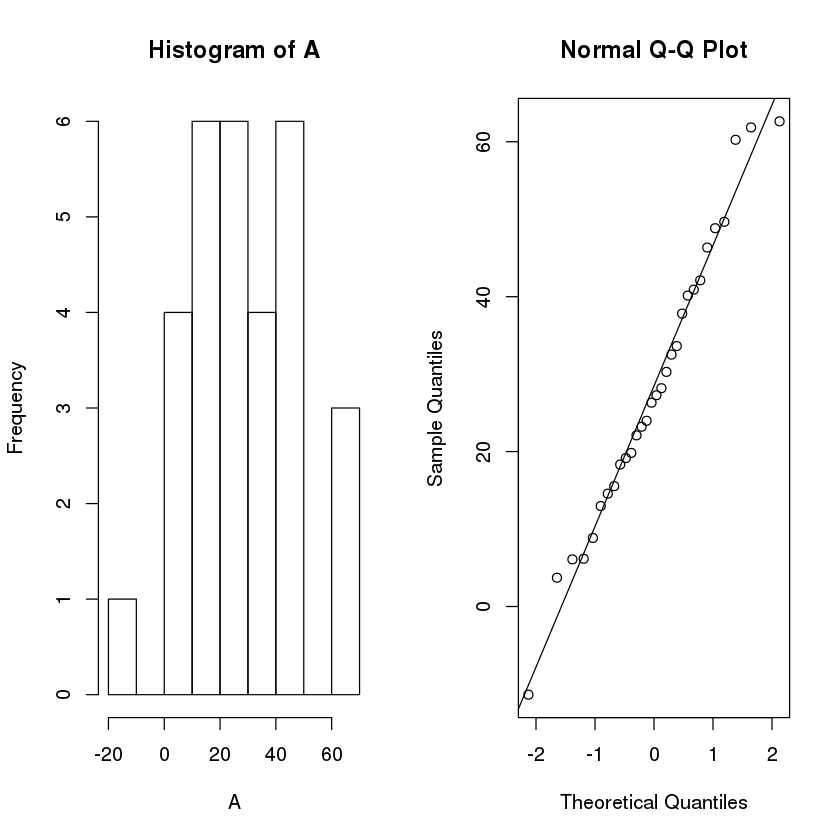

In [48]:
par(mfrow=c(1,2)) 	# Mostrar dos gráficos adyatences
A <- rnorm(n = 30, mean = 30, sd = 20) # Generar datos ficticios

sd(A)
hist(A)    # Genera histograma de A

qqnorm(A)	# Genera plot de cuantiles de A
qqline(A)	# Genera línea datos ideales

# Simetría

**Simetría** hace referencia a la distancia de la media al menor valor en proporción a la distancia de la media al valor mayor.

- Si el valor de la simetría se acerca a ( $S$~$0$ ), indica que la distribución es simétrica, es decir ambos valores extremos están aproximadamente a la misma distancia de la media.
- Si el valor de la simetría es positivo ($S > 0$) indica que el valor menor está más cerca de la media que el valor mayor, inclinando la media hacia la izquierda.
- Si el valor de la simetría es negativo ($S < 0$) indica que el valor mayor está más cerca de la media que el valor menor, inclinando la media hacia la derecha.


<div style="align: center; text-align:center;">
    <img src="img/skewness.png" height="600px" width="400px" />
    <div class="caption">Simetría en la distribución de los datos</div>
</div>




# Curtosis 

La curtosis indica qué tan pronunciada es la forma de campana en una distribución normal. 

- Una curtosis muy alta denota una campana alargada y con las colas muy bajas -  **Leptocúrtica**
- Un valor intermedio denota una campana "ideal" con la punta semicircular y la curva de las colas pronunciada -  **Mesocúrtica**
- Una curtosis muy baja indica una campana chata y ancha con la curva de las colas poco pronunciada - **Platycúrtica**

<div class="alert alert-warning">
<b>Nota</b> - En una distribución normal "ideal", la curtosis tiene un valor cercano a 3.
</div>

<div style="align: center; text-align:center;">
    <img src="img/kurtosis1.jpg" height="600px" width="400px" />
    <div class="caption">Forma de la curva según el tipo de curtosis</div>
</div>



# Simetría y Curtosis

El paquete *moments* de R tiene las funciones para calcular la simetría: *skewness()*, y la curtosis: *kurtosis()*.

<div style="align: center; text-align:center;">
    <img src="img/Kurtosis.png" height="800px" width="800px" />
    <div class="caption">Diferentes curvas para valores de curtosis y simetría</div>
</div>



In [ ]:
?rbeta


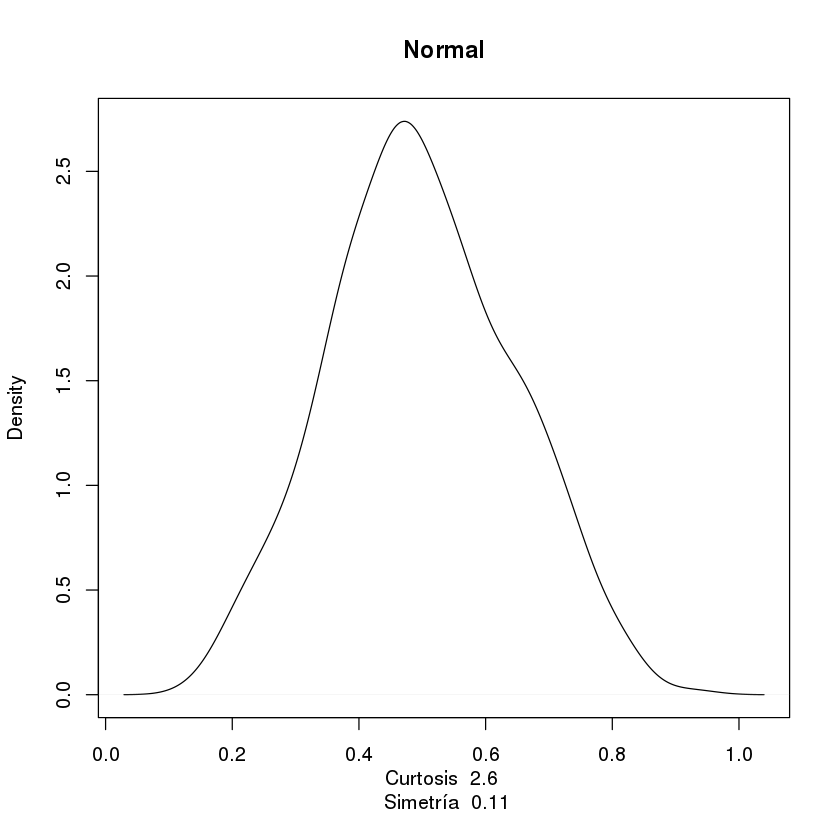

In [49]:
library("moments")
    
A <- rbeta(500,5,5)  #Generar datos en distribución beta
    
curtosis <- kurtosis(A)
simetria <- skewness(A)
    
plot (density(A), main = "Normal", 
      xlab = paste("Curtosis ", round(curtosis, 2), "\n", 
                   "Simetría ", round(simetria,2)))

<a id='transformacion'></a>
<hr>
<hr>
<h1><center><span style="color:blue">Transformación de datos</span></center></h1>
<hr>
<hr>



<h1><center>¿Qué hacer si los datos no están normalmente distribuidos?</center></h1>
<h2><center>Aplicar una transformación simple a los datos para alterar su distribución</center></h2>

# Transformaciones logarítmicas <a id='logaritmicas'></a>

Estas son las más comunes y se emplean principalmente cuando:

- Los datos están altamente sesgados
- El rango de los datos es muy amplio, incluso varía en órdenes de magnitud
- Existen outliers (datos extremos)
- No hay valores negativos



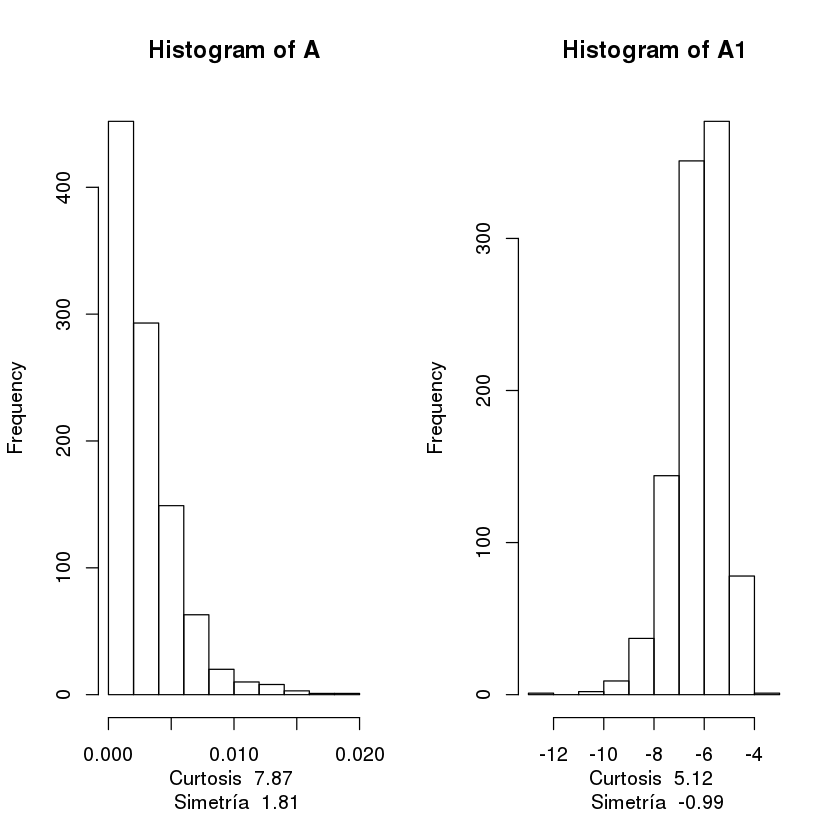

In [50]:
library("moments")
par(mfrow=c(1,2))           # Mostrar dos gráficos simultáneamente

A <- rbeta(1000,1.5,500)    # Generar datos en distribución beta
A1 <- log(A)                # Transformar datos

# Graficar los resultados
hist(A, xlab = paste("Curtosis ", round(kurtosis(A),2), "\n", "Simetría ", round(skewness(A),2)))
hist(A1, xlab = paste("Curtosis ", round(kurtosis(A1),2), "\n", "Simetría ", round(skewness(A1),2)))

# Transformaciones exponenciales <a id='exponenciales'></a>

Incluyen todas aquellas elevadas a una potencia (pueden ser fracciones, negativa o positiva). La más común es la raíz cuadrada.




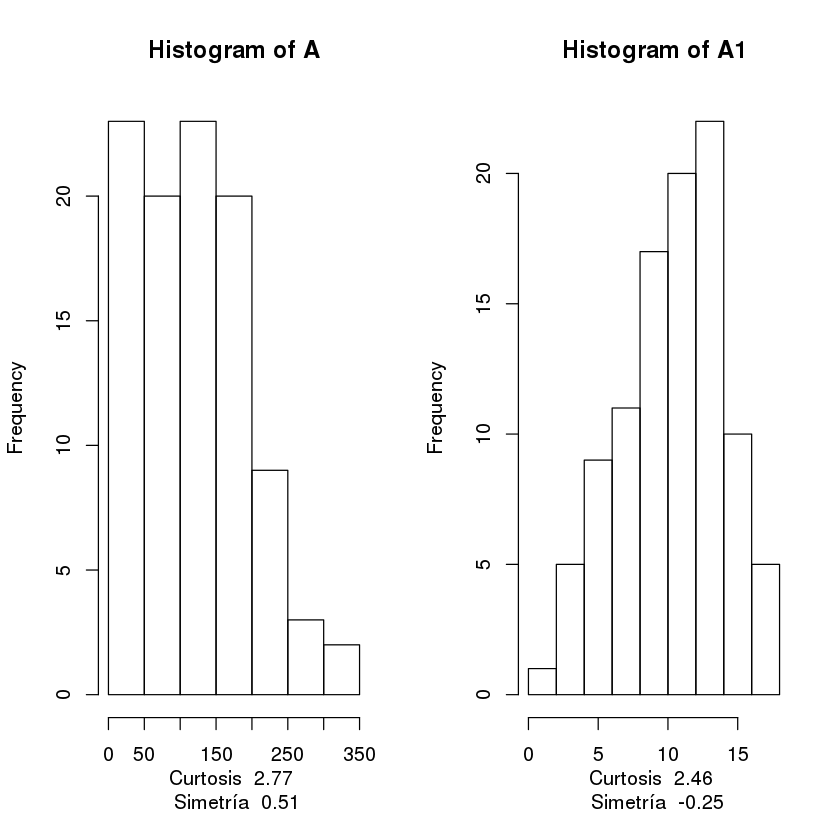

In [51]:
par(mfrow=c(1,2))
library("moments")

A <- rnorm(100, 10, 4)^2
A1 <- A^(1/2)

hist(A, xlab = paste("Curtosis ", round(kurtosis(A),2), "\n", "Simetría ", round(skewness(A),2)))
hist(A1, xlab = paste("Curtosis ", round(kurtosis(A1),2), "\n", "Simetría ", round(skewness(A1),2)))


<a id='practica'></a>
<hr>
<hr>
<h1><center><span style="color:blue">Práctica de manipulación de datos</span></center></h1>
<hr>
<hr>


# Ejercicio 

Con el archivo DATA.csv realizar las siguientes operaciones:

1. Importar el archivo en un marco de datos
2. Eliminar todos los registros en los que el país sea China
3. Eliminar las columnas de Nombre y Apellido
4. Calcular el mayor, menor, promedio y desviación estándar de las columnas Edad, Peso y Altura, ignorando los valores faltantes
    1. Rellenar los valores faltantes con el promedio respectivo de la columna
    2. Calcular, nuevamente, el mayor, menor, promedio y desviación estándar de las columnas Edad, Peso y Altura. ¿Hay alguna diferencia? ¿Porqué?
5. Identificar cuantos registros tiene el país con mayor frecuencia\**

    

\* Las funciones *min()*, *max()*, *mean()*, y *sd()* calculan el mínimo, máximo, promedio, y desviación estándar de un vector, respectivamente.

\*\* La función *table()* crea una tabla de frecuencias de valores de un vector.

In [54]:
set1 <- read.csv("dataset/DATA.csv", stringsAsFactors=F) #www.mockaroo.com
head(set1)
nrow(set1)

id,first_name,last_name,country,age,weight,height
1,Louis,Hunter,France,54,NA,197.39
2,Irene,Nelson,Poland,32,139.86,199.71
3,Stephen,Stone,Philippines,20,97.03,185.16
4,Beverly,Austin,China,42,53.47,177.55
5,Randy,Price,Greece,46,97.91,180.40
6,Jonathan,Wright,Georgia,53,143.12,167.05


[1] 1000

In [55]:
table(set1$country)


                     Afghanistan                    Aland Islands 
                               7                                1 
                         Albania                        Argentina 
                               3                               15 
                         Armenia                        Australia 
                               3                                1 
                      Azerbaijan                       Bangladesh 
                               3                                4 
                        Barbados                          Belarus 
                               1                                2 
                         Bolivia           Bosnia and Herzegovina 
                               1                                1 
                        Botswana                           Brazil 
                               1                               40 
                        Bulgaria                          Bur